---
title: Titanic Competition - First try
execute:
  freeze: true
  echo: true
number-sections: true
toc: true
toc-depth: 4
format:
  html:
    toc-expand: false
---

I start by first retrieving the data for training and testing.

All data is readily available on the kaggle competition website.

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

import pandas as pd
import os

train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')

Let's have a look at data now:

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Overview

In [ ]:
print(f'\nTest DataFrame shape — Rows: {train_df.shape[0]}, Columns: {train_df.shape[1]}\n')


Test DataFrame shape — Rows: 891, Columns: 12



We have, in the training set a total of 891 rows and 12 columns.
The columns are:

- **passengerId**: Not meaningful, shall be dropped.
- **Survived**: is the dependant variable.
- **Pclass**: socio-economic status (SES)
            1st = Upper
            2nd = Middle
            3rd = Lower
- **Name**: Contains title, full name and maiden name when that's the case.
- **Sex**: let '0' be for male and '1' for female.
- **Age**: What to do when age is not available (NaN)? turn it into 0?
- **SibSp**: # of siblings / spouses aboard the Titanic. Will be kept as is.
- **Parch**: # of parents / children aboard the Titanic. Will be kept as is.
- **Ticket**: Have to figure out how to take advantage of this information, to extract some insight.
- **Fare**: Price paid for said ticket or group of tickets if for whole family.
- **Cabin**: Cabin number can indicate the socio-economic class of the passenger since only first class passengers have a cabin and the rest are unknown. Cabin numbers look like this "C123", where the first letter indicates the deck.
- **Embarked**: Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton. Will create three columns with binary values C_embark, Q_embark, S_embark, respectively.

In [ ]:
print(f'\nTest Dataframe general info: \n')
train_df.info()


Test Dataframe general info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columns "Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked" are all category data.

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The test dataframe is similar to that of the train one except the survival column that we have to fill out with a prediction model.

In [ ]:
print(f'\nTrain set Missing data:\n{train_df.isnull().sum()} \n')
print('-----------')
print('-----------')
print(f'\nTest set Missing data:\n{test_df.isnull().sum()} \n')


Train set Missing data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

-----------
-----------

Test set Missing data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



4 features have missing data:
* Age: in both train and test sets.
* Cabin: also in both train and test sets and in large quantities. Can mean that the majority of passengers didn't have a cabin.
* Fare: for 1 passenger in the test set.
* Embarked: for 2 passengers in the train set.

All will have to be filled out later in one way or another if these are found to be meaningful features.

# EDA — Exploratory Data Analysis

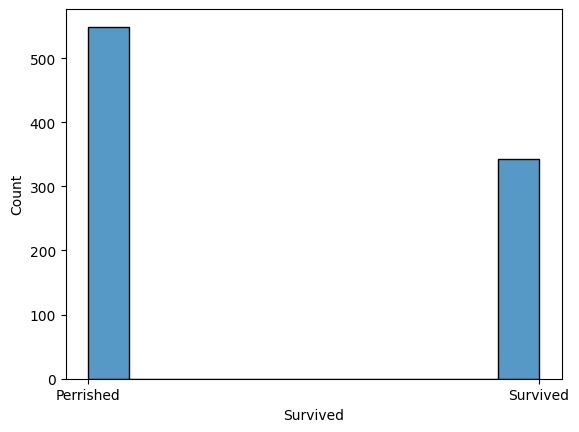

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
graph = sns.histplot(train_df["Survived"])
graph.set_xticks(np.arange(2), labels = ('Perrished', 'Survived'))

## 1. Ticket class

<Axes: xlabel='Pclass', ylabel='count'>

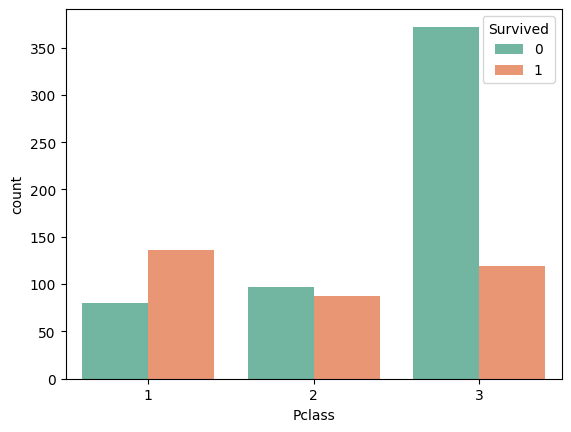

In [ ]:
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set2')

In [ ]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


The higher the class, the more likely the survival.
We just need to map these values to (-1, 1)

In [ ]:
mapping_pclass = {1:1, 2:0, 3:-1}

## 2. Name

In [ ]:
train_df["Name"].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


The column "Name" contains:
- Family Name.
- Title.
- First name + Maiden name when applicable.

The title can give an indication on the age as well as the socio-economic class.

## 3. Sex

<Axes: xlabel='Sex', ylabel='count'>

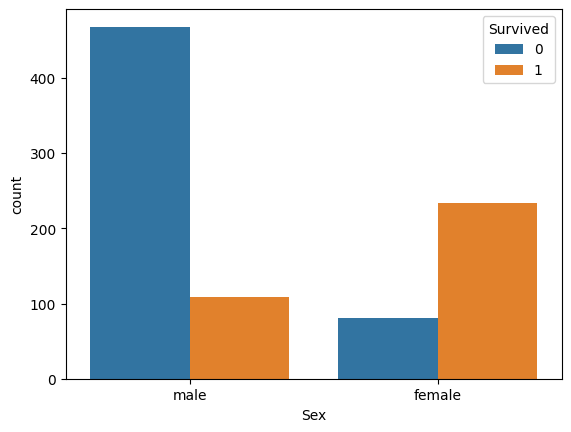

In [ ]:
sns.countplot(data=train_df, x='Sex', hue='Survived')

In [ ]:
train_df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


Females were more likely to survive.
The feature being categorical and descriptive enough will be left as is.

## 4. Age

<Axes: xlabel='AgeGroup', ylabel='count'>

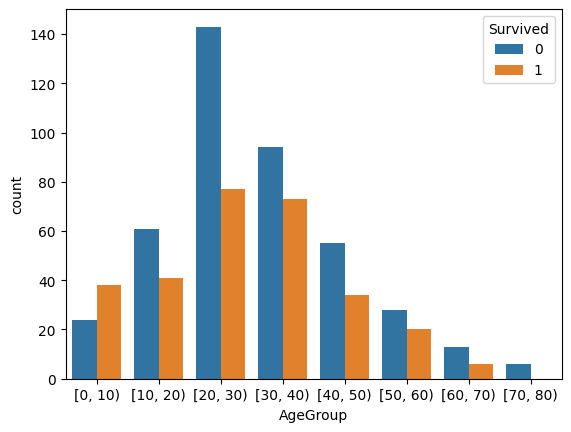

In [ ]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=range(0, 81, 10), right=False)
sns.countplot(data=train_df, x='AgeGroup', hue='Survived')

It's tricky to conclude on age, will need to be filled and properly engineered into a meaningful feature.

## 5. SibSp

In [ ]:
train_df[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## 6. Parch

In [ ]:
train_df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


SibSp and Parch can be combined into a single feature.
Both indicate that the more family you have the lower the survival rate

## 7. Ticket

In [ ]:
train_df["Ticket"].nunique()

681

In [ ]:
train_df["Ticket"].head()

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


There is a total of 681 different ticket values, so it's complex to draw conclusions from this feature.

There are definetly passengers sharing the same ticket.

What can be done here is the find the passengers sharing the same ticket and divide the ticket fare over the group.

Tickets also seem to have prefixes that can give some indication.

## 8. Fare

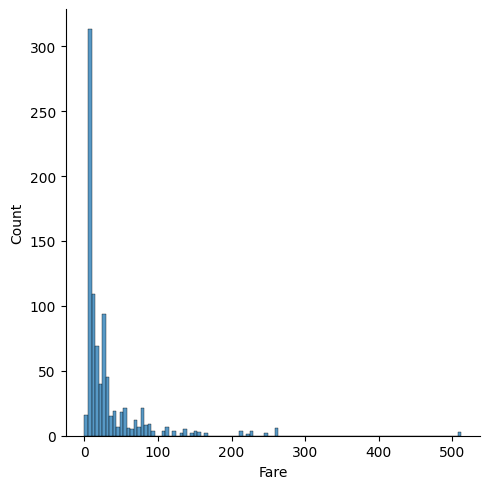

In [ ]:
sns.displot(train_df.Fare.dropna())

<Axes: xlabel='FareGroup', ylabel='count'>

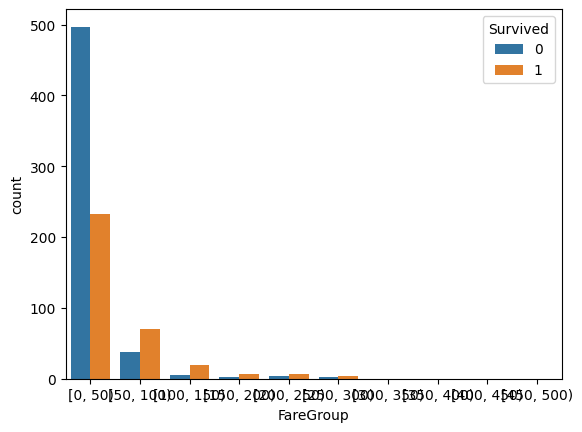

In [ ]:
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins=range(0, 513, 50), right=False)
sns.countplot(data=train_df, x='FareGroup', hue='Survived')

Fare is a tricky feature as it is linked to the socio-economic class of the person. So it is not surprising that its impact on survival rate is less clear.

## 9. Cabin

In [ ]:
train_df["Cabin"].head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


Cabin numbers are usually are composed of a letter following by 2 or 3 digits.
But approximately 80% of this feature is missing.

## 10. Embarked

In [ ]:
train_df.groupby('Embarked')['PassengerId'].count()  # Counts passengers per Embarked port

,PassengerId
Embarked,
C,168
Q,77
S,644


In [ ]:
train_df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
train_df.groupby('Embarked')['Sex'].apply(lambda x: (x == 'male').mean()).sort_values(ascending=False)

,Sex
Embarked,
S,0.684783
C,0.565476
Q,0.532468


In [ ]:
train_df[['Embarked', 'Pclass']].groupby('Embarked').mean().sort_values(by='Pclass', ascending=False)

,Pclass
Embarked,
Q,2.909091
S,2.350932
C,1.886905


To be engineered.

# Feature Engineering

It's time for some modifications into our datasets to extract meaningful features for predictions.

Also, I need to separate this set into train and val subsets to check model accuracy.

In [ ]:
preprocessed_train = pd.DataFrame()

## 1. Type Casting
I start by type casting the necessary columns.

In [ ]:
preprocessed_train["Survived"] = train_df["Survived"].astype('category')
preprocessed_train["Pclass"]   = train_df["Pclass"].map(mapping_pclass).astype('category')
preprocessed_train["Sex"]      = train_df["Sex"].astype('category')
preprocessed_train["Age"]      = train_df["Age"]
preprocessed_train["Ticket"]   = train_df["Ticket"].astype('category')
preprocessed_train["Fare"]     = train_df["Fare"]
preprocessed_train["Cabin"]    = train_df["Cabin"].fillna("Unknown").astype('category')
preprocessed_train["Embarked"] = train_df["Embarked"].astype('category')

## 2. Extract Title, and group them

Notice that in the name column we have:
* First name.
* Title.
* Family Name.
* Maiden name when applicable.

Using regular expressions, we can separate the bundled data and add new columns.

In [ ]:
import re
def extract_titles(name):
    title_search = re.search(r',\s*([^\.]*)\.', name)
    if title_search:
        return title_search.group(1).strip()
    return ""

preprocessed_train["Title"] = train_df["Name"].apply(extract_titles).astype('category')
print(preprocessed_train["Title"].unique().tolist())

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


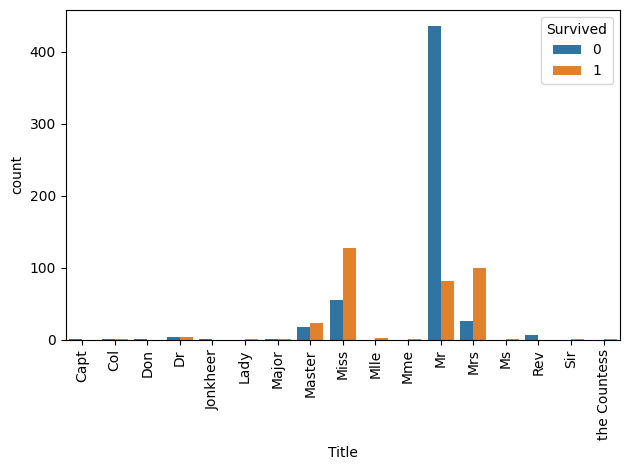

In [ ]:
sns.countplot(data=preprocessed_train, x='Title', hue='Survived')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
def group_titles(title):
    title = title.lower()
    if title in ["mrs", "mme"]:
        return "Mrs"
    elif title in ["miss", "ms", "mlle"]:
        return "Ms"
    elif title in ["master", "don", "lady", "sir", "jonkheer", "donna", "the countess"]:
        return "Noble"
    elif title in ["col", "capt", "dr", "major"]:
        return "Officer"
    elif title in ["rev"]:
        return "Clergy"
    else:
        return title.capitalize()

preprocessed_train["Grouped_title"] = preprocessed_train["Title"].apply(group_titles).astype('category')
print(preprocessed_train["Grouped_title"].unique().tolist())

['Mr', 'Mrs', 'Ms', 'Noble', 'Clergy', 'Officer']


In [ ]:
print(preprocessed_train.groupby(['Sex', 'Grouped_title']).count().Pclass)

Sex     Grouped_title
female  Clergy             0
        Mr                 0
        Mrs              126
        Ms               185
        Noble              2
        Officer            1
male    Clergy             6
        Mr               517
        Mrs                0
        Ms                 0
        Noble             43
        Officer           11
Name: Pclass, dtype: int64


/tmp/ipython-input-2974352889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(preprocessed_train.groupby(['Sex', 'Grouped_title']).count().Pclass)


There don't seem to be a mislabelled passenger.

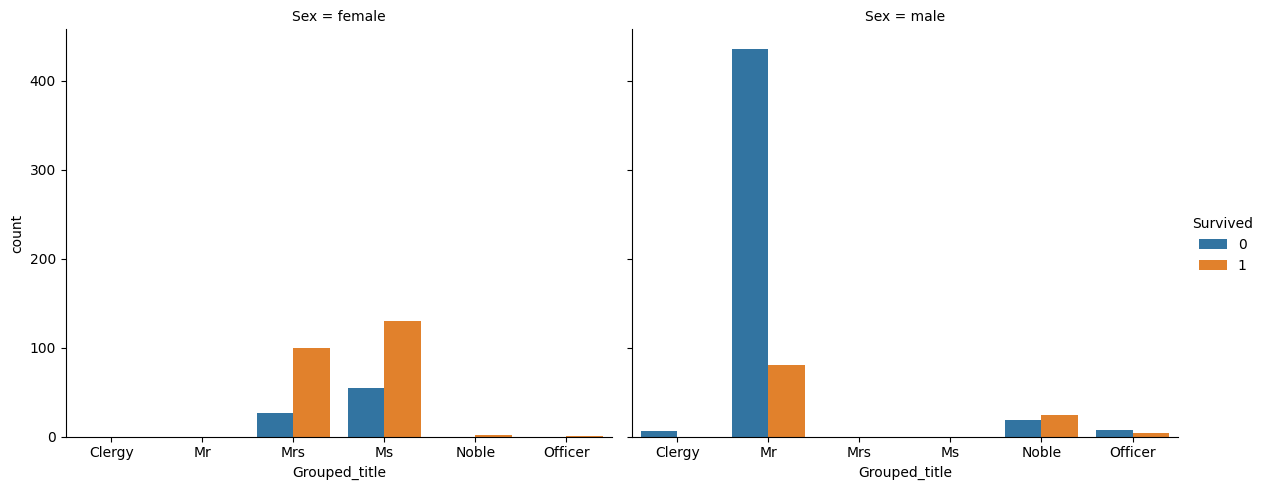

In [ ]:
sns.catplot(
    data=preprocessed_train,
    x='Grouped_title',
    hue='Survived',
    col='Sex',
    kind='count',
    height=5,
    aspect=1.2
)

## 3. Extract family names

In [ ]:
def extract_family_name(name):
    return name.split(",")[0].strip()
preprocessed_train["Family_name"] = train_df["Name"].apply(extract_family_name).astype('category')
print(preprocessed_train["Family_name"].unique())
preprocessed_train["Family_name"].value_counts()

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', ..., 'Banfield', 'Sutehall', 'Montvila', 'Behr', 'Dooley']
Length: 667
Categories (667, object): ['Abbing', 'Abbott', 'Abelson', 'Adahl', ..., 'de Pelsmaeker',
                           'del Carlo', 'van Billiard', 'van Melkebeke']


,count
Family_name,
Andersson,9
Sage,7
Johnson,6
Panula,6
Goodwin,6
...,...
Hewlett,1
Hirvonen,1
Hodges,1


## 4. Extract deck and group them

In [ ]:
def extract_deck(cabin):
    if pd.isna(cabin) or cabin=="Unknown":
        return "Unknown"
    return cabin[0].upper()
preprocessed_train["Deck"] = preprocessed_train["Cabin"].apply(extract_deck).astype('category')
print(preprocessed_train["Deck"].unique().tolist())

['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']


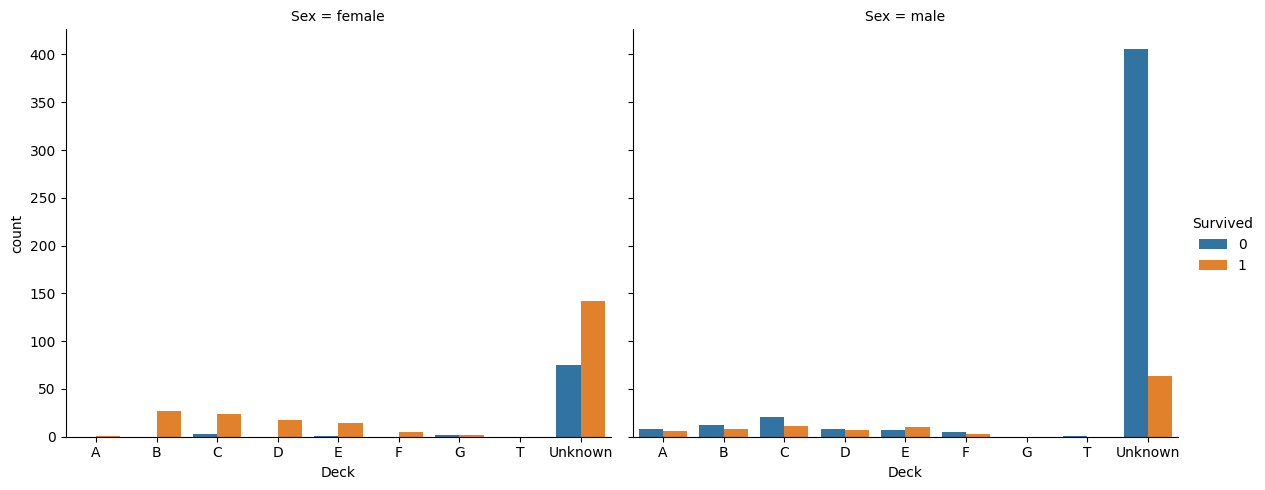

In [ ]:
sns.catplot(
    data=preprocessed_train,
    x='Deck',
    hue='Survived',
    col='Sex',
    kind='count',
    height=5,
    aspect=1.2
)

In [ ]:
print(preprocessed_train.groupby(['Sex', 'Deck']).count().Survived)

Sex     Deck   
female  A            1
        B           27
        C           27
        D           18
        E           15
        F            5
        G            4
        T            0
        Unknown    217
male    A           14
        B           20
        C           32
        D           15
        E           17
        F            8
        G            0
        T            1
        Unknown    470
Name: Survived, dtype: int64


/tmp/ipython-input-3488245406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(preprocessed_train.groupby(['Sex', 'Deck']).count().Survived)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Make sure 'Survived' is numeric
preprocessed_train['Survived_float'] = preprocessed_train['Survived'].astype(float)

# Compute stats per Deck
deck_stats = preprocessed_train.groupby('Deck').agg(
    mean_survival=('Survived_float', 'mean'),
    count=('Survived_float', 'count')
).reset_index()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(deck_stats[['mean_survival', 'count']])

# Apply k-mean clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
deck_stats['deck_cluster'] = kmeans.fit_predict(X_scaled)

# Merge back into main dataframe

preprocessed_train = preprocessed_train.merge(
    deck_stats[['Deck', 'deck_cluster']],
    on='Deck',
    how='left'
)

preprocessed_train.groupby('deck_cluster').count()['Survived']

/tmp/ipython-input-2964386158.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deck_stats = preprocessed_train.groupby('Deck').agg(


,Survived
deck_cluster,
0,184
1,687
2,20


## 5. Add family size feature

<Axes: xlabel='Family_size', ylabel='count'>

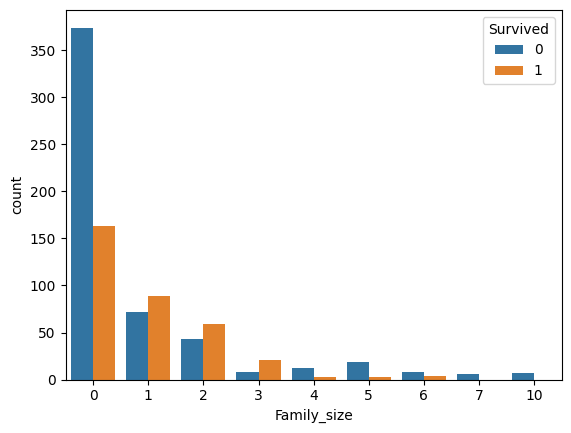

In [ ]:
preprocessed_train["Family_size"] = train_df["SibSp"] + train_df["Parch"]
sns.countplot(data=preprocessed_train, x='Family_size', hue='Survived')

The family size can be divided into 4 categories:
- Alone (0).
- Small (1 to 3)
- Medium (4 to 6)
- Large (7+)

<Axes: xlabel='Family_type', ylabel='count'>

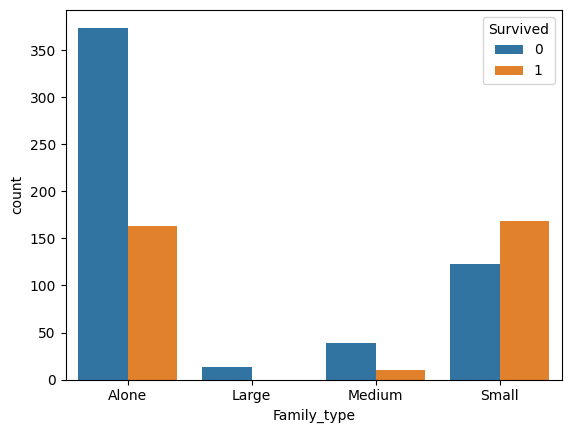

In [ ]:
def extract_family_type(family_size):
    if pd.isna(family_size):
        return "Unknown"
    elif family_size ==0:
        return "Alone"
    elif family_size <=3:
        return "Small"
    elif family_size <=6:
        return "Medium"
    else:
        return "Large"

preprocessed_train["Family_type"] = preprocessed_train["Family_size"].apply(extract_family_type).astype('category')
sns.countplot(data=preprocessed_train, x='Family_type', hue='Survived')

This new grouping seems more meaningful.

<Axes: xlabel='Family_type', ylabel='count'>

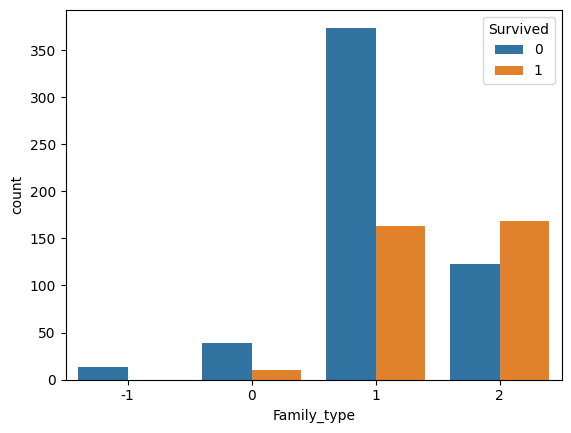

In [ ]:
family_size_mapping = {"Alone":1, "Small": 2, "Medium": 0, "Large": -1}
preprocessed_train["Family_type"] = preprocessed_train["Family_type"].map(family_size_mapping).astype(int)
sns.countplot(data=preprocessed_train, x='Family_type', hue='Survived')

## 6. Extract age group and fill missing data

There are approximately 20% of missing values that we need to fill.
Moreover, as seen in EDA, age as is, isn't meaningful enough.
So first, I classify age into:
- Child ( 0 to 12)
- Teen (13 to 19)
- Adult (19 to 59)
- Senior (60+)

['Adult', 'Unknown', 'Child', 'Teen', 'Senior']


<Axes: xlabel='Age_group', ylabel='count'>

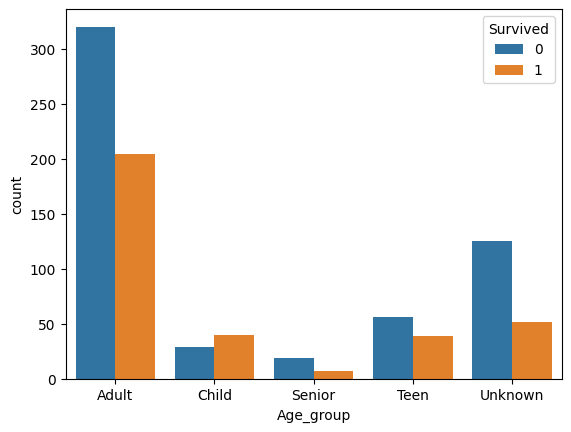

In [ ]:
def extract_age_group(age):
    if pd.isna(age):
        return "Unknown"
    elif age <= 12:
        return "Child"
    elif age <=19:
        return "Teen"
    elif age <=59:
        return "Adult"
    else:
        return "Senior"


preprocessed_train["Age_group"] = preprocessed_train["Age"].apply(extract_age_group).astype('category')
print(preprocessed_train["Age_group"].unique().tolist())
sns.countplot(data=preprocessed_train, x='Age_group', hue='Survived')


Now the question is, how do I fill the rest of the missing data.
Different options here:
- Use the median age per age group.
- Take random values from a gaussian distrbution N(mean, std_deviation) for each age group.
- Train a linear regression model to predict age using categorical features (`Pclass`, `Grouped_title`, `Sex`, `Embarked`, `Family_type`).

I choose the last option.

In [ ]:
preprocessed_train["Age"].isnull().sum()

np.int64(177)

In [ ]:
age_features = preprocessed_train[["Pclass", "Grouped_title", "Sex", "Embarked", "Age_group"]]
age_features = age_features[preprocessed_train["Age"].notna()]
age_target = preprocessed_train["Age"].dropna()


In [ ]:
age_target.isnull().sum()

np.int64(0)

I use sklearn's linear regression model.

However, I need to transform the categorical features.
For that i use the OneHotEncoder which creates a binary column for each category. Such that each category is treated independently and no false ordinal relationship is assumed.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

age_features = preprocessed_train[["Pclass", "Grouped_title", "Sex", "Embarked", "Age_group"]]
age_features = age_features[preprocessed_train["Age"].notna()]
age_target = preprocessed_train["Age"].dropna()

X = age_features  # Features (Pclass, Sex, Embarked, etc.)
y = age_target    # Target (Age)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

categorical_cols = ["Pclass", "Grouped_title", "Sex", "Embarked", "Age_group"]
numerical_cols = []

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)  # Train on 80% of data
y_pred = model.predict(X_test)  # Predict on the remaining 20%

# Calculate MSE first, then take square root for RMSE
mae   = mean_absolute_error(y_test, y_pred)
rmse  = mean_squared_error(y_test, y_pred) ** 0.5  # Manual RMSE
r2    = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} years | RMSE: {rmse:.2f} years | R²: {r2:.2f}")

# Predict missing ages
missing_age_mask = preprocessed_train["Age"].isna()
print(f"Number of missing ages: {missing_age_mask.sum()}")
X_missing = preprocessed_train.loc[missing_age_mask, categorical_cols].copy()
print(f"X_missing shape: {X_missing.shape}")
nan_counts = X_missing.isna().sum()
if nan_counts.sum() > 0:
    print(f"Warning: NaN values in features:")
predicted_ages = model.predict(X_missing)
preprocessed_train.loc[missing_age_mask, "Age"] = predicted_ages
print(f"✅ SUCCESS! Predicted {len(predicted_ages)} ages")
print(f"Predicted age range: {predicted_ages.min():.1f} - {predicted_ages.max():.1f}")
print(f"Remaining missing ages: {preprocessed_train['Age'].isna().sum()}")

MAE: 6.21 years | RMSE: 8.17 years | R²: 0.64
Number of missing ages: 177
X_missing shape: (177, 5)
✅ SUCCESS! Predicted 177 ages
Predicted age range: 23.9 - 38.2
Remaining missing ages: 0


I need to group the new age values too.

['Adult', 'Child', 'Teen', 'Senior']


<Axes: xlabel='Age_group', ylabel='count'>

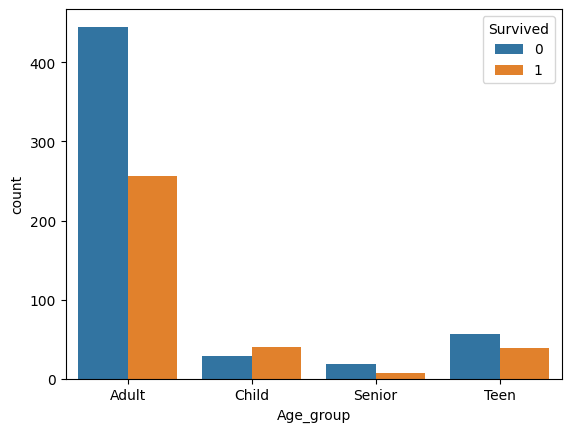

In [ ]:
preprocessed_train["Age_group"] = preprocessed_train["Age"].apply(extract_age_group).astype('category')
print(preprocessed_train["Age_group"].unique().tolist())
sns.countplot(data=preprocessed_train, x='Age_group', hue='Survived')

## 7. Fill missing Embarked values


I will use the mode of Pclass and Fare else the most recurrent embarkation port is S for Southampton.

In [ ]:
preprocessed_train["Embarked"] = (preprocessed_train.groupby(["Pclass", "Fare"])["Embarked"]
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "S")))

/tmp/ipython-input-329147121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preprocessed_train["Embarked"] = (preprocessed_train.groupby(["Pclass", "Fare"])["Embarked"]


In [ ]:
preprocessed_train["Embarked"].isna().sum()

np.int64(0)

## 8. Add feature of group size

In [ ]:
# GroupSize: Number of passengers sharing the same ticket
preprocessed_train["GroupSize"] = preprocessed_train.groupby("Ticket")["Ticket"].transform("count").astype('int')

# Check the new column
preprocessed_train["GroupSize"].unique()

/tmp/ipython-input-2115061349.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preprocessed_train["GroupSize"] = preprocessed_train.groupby("Ticket")["Ticket"].transform("count").astype('int')


array([1, 2, 4, 3, 7, 5, 6])

In [ ]:
# GroupSize: Number of passengers sharing the same ticket
preprocessed_train["GroupSize"] = preprocessed_train.groupby("Ticket")["Ticket"].transform("count").astype('int')
# FarePerPerson: Calculate fare per person
preprocessed_train["FarePerPerson"] = preprocessed_train["Fare"] / preprocessed_train["GroupSize"]

/tmp/ipython-input-850540180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preprocessed_train["GroupSize"] = preprocessed_train.groupby("Ticket")["Ticket"].transform("count").astype('int')


## 9. Group ticket prefixes

In [ ]:
def get_ticket_prefix(ticket_nbr):
    if ticket_nbr.isdigit():
        return "None"
    else:
        return ticket_nbr.replace('.','').replace('/', '').split(' ')[0]

preprocessed_train["Ticket_prefix"] = preprocessed_train["Ticket"].apply(get_ticket_prefix).astype('category')
preprocessed_train.groupby('Ticket_prefix').count()['Survived']

/tmp/ipython-input-452750261.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preprocessed_train.groupby('Ticket_prefix').count()['Survived']


,Survived
Ticket_prefix,
A4,7
A5,21
AS,1
C,5
CA,41
CASOTON,1
FC,1
FCC,5
Fa,1


There are way too many labels.

To simplify this, I need to group some labels together.

To do that I will use hierarchical clustering.

/tmp/ipython-input-1325074908.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prefix_stats = preprocessed_train.groupby('Ticket_prefix').agg(


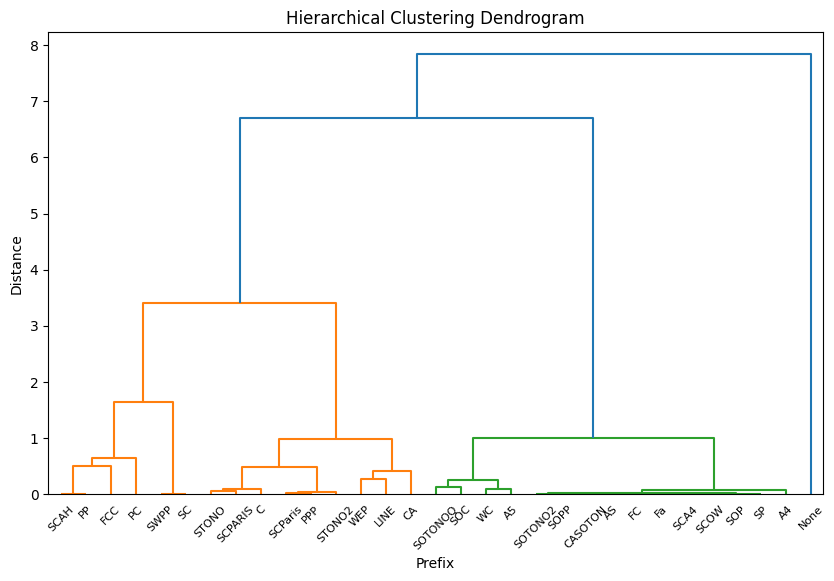

-----------
-----------
prefix_cluster
1     72
2    158
3    661
Name: Survived, dtype: int64


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Now safely compute mean and count per Ticket_prefix
prefix_stats = preprocessed_train.groupby('Ticket_prefix').agg(
    mean_survival=('Survived_float', 'mean'),
    count=('Survived_float', 'count')
).reset_index()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(prefix_stats[['mean_survival', 'count']])

# Compute the linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=prefix_stats['Ticket_prefix'].values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Prefix')
plt.ylabel('Distance')
plt.show()

# Assign each prefix to one of 3 clusters
prefix_stats['prefix_cluster'] = fcluster(linked, t=3, criterion='maxclust')

# Merge back to the main dataset
preprocessed_train = preprocessed_train.merge(
    prefix_stats[['Ticket_prefix', 'prefix_cluster']],
    on='Ticket_prefix',
    how='left'
)
print('-----------')
print('-----------')
# Check number of entries in each cluster
print(preprocessed_train.groupby('prefix_cluster')['Survived'].count())

# Group feature engineering under a preprocessing function

## 1. Helper functions

In [ ]:
import re
import pandas as pd

def extract_titles(name):
  """Extract titles from passenger names"""
  if pd.isna(name):
      return ""
  title_search = re.search(r',\s*([^\.]*)\.', name)
  if title_search:
      return title_search.group(1).strip()
  return ""

def group_titles(title):
  """Group similar titles together"""
  title = title.lower()
  if title in ["mrs", "mme"]:
      return "Mrs"
  elif title in ["miss", "ms", "mlle"]:
      return "Ms"
  elif title in ["master", "don", "lady", "sir", "jonkheer", "donna", "the countess"]:
      return "Noble"
  elif title in ["col", "capt", "dr", "major"]:
      return "Officer"
  elif title in ["rev"]:
      return "Clergy"
  else:
      return title.capitalize()

def extract_deck(cabin):
  """Extract deck letter from cabin"""
  if pd.isna(cabin) or cabin=="Unknown":
      return "Unknown"
  return cabin[0].upper()

def safe_fare_fill(row, median_map, fallback_fare):
  try:
      return median_map.loc[row["Pclass"], row["Embarked"]]
  except KeyError:
      return fallback_fare

def get_ticket_prefix(ticket_nbr):
  """Extract ticket prefix (letters/numbers before the last set of digits)"""
  if ticket_nbr.isdigit():
        return "None"
  else:
      return ticket_nbr.replace('.','').replace('/', '').split(' ')[0]

def extract_age_group(age):
  """Categorize age into groups"""
  if pd.isna(age):
      return "Unknown"
  elif age <= 12:
      return "Child"
  elif age <=19:
      return "Teen"
  elif age <=59:
      return "Adult"
  else:
      return "Senior"

def extract_family_type(family_size):
  """Categorize family size into types"""
  if pd.isna(family_size):
      return "Unknown"
  elif family_size ==0:
      return "Alone"
  elif family_size <=3:
      return "Small"
  elif family_size <=6:
      return "Medium"
  else:
      return "Large"

def light_preprocessing(df):
  """Initial preprocessing steps"""

  df = df.copy()
  pre = pd.DataFrame()
  mapping_pclass = {1:1, 2:0, 3:-1}
  pre["Pclass"]   = df["Pclass"].map(mapping_pclass).astype('category')
  pre["Sex"]      = df["Sex"].astype('category')
  pre["Age"]      = df["Age"]
  pre["Cabin"]    = df["Cabin"].fillna("Unknown").astype('category')
  pre["Embarked"] = df["Embarked"].astype('category')
  pre["Ticket"]   = df["Ticket"].astype('category')
  pre["Fare"]     = df["Fare"]

  pre["Title"]         = df["Name"].apply(extract_titles).astype('category')
  pre["Grouped_title"] = pre["Title"].apply(group_titles).astype('category')
  pre["Deck"]          = pre["Cabin"].apply(extract_deck).astype('category')
  pre["Ticket_prefix"] = df["Ticket"].apply(get_ticket_prefix).astype('category')
  pre["Age_group"]     = pre["Age"].apply(extract_age_group).astype('category')


  return pre

## 2. Trainers for imputing missing data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import linkage, fcluster

class PreprocessingTrainer:
    def __init__(self, raw_train_df):
        light_df = light_preprocessing(raw_train_df)
        light_df["Survived"] = raw_train_df["Survived"].astype('category')
        self.deck_cluster_model = self._get_deck_cluster_mapping(light_df)
        self.age_imputer_model = self._train_age_imputer(
            light_df,
            categorical_cols=["Pclass", "Grouped_title", "Sex", "Embarked", "Age_group"]
        )
        self.prefix_cluster_model = self._train_prefix_cluster(light_df)

    def _get_deck_cluster_mapping(self, train_df):
        """Create deck clustering model"""
        df = train_df.copy()

        # Check if Survived column exists
        if 'Survived' not in df.columns:
            raise ValueError("Training data must contain 'Survived' column")

        df['Survived_float'] = df['Survived'].astype(float)
        deck_stats = df.groupby('Deck').agg(
            mean_survival=('Survived_float', 'mean'),
            count=('Survived_float', 'count')
        ).reset_index()

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(deck_stats[['mean_survival', 'count']])

        kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
        deck_stats['deck_cluster'] = kmeans.fit_predict(X_scaled)

        return {
            'deck_cluster_map': deck_stats.set_index('Deck')['deck_cluster'].to_dict(),
            'scaler': scaler,
            'kmeans': kmeans
        }

    def _train_age_imputer(self, train_df, categorical_cols, target_col="Age"):
        """Train age imputation model"""
        train_data = train_df[train_df[target_col].notna()]
        X_train = train_data[categorical_cols]
        y_train = train_data[target_col]

        preprocessor = ColumnTransformer([
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ], remainder='passthrough')

        model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])

        model.fit(X_train, y_train)
        return model

    def _train_prefix_cluster(self, train_df, prefix_col='Ticket_prefix', survival_col='Survived'):
        """Train ticket prefix clustering model"""
        df = train_df.copy()

        # Check if Survived column exists
        if survival_col not in df.columns:
            raise ValueError("Training data must contain 'Survived' column")

        df['Survived_float'] = df[survival_col].astype(float)

        prefix_stats = df.groupby(prefix_col).agg(
            mean_survival=('Survived_float', 'mean'),
            count=('Survived_float', 'count')
        ).reset_index()

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(prefix_stats[['mean_survival', 'count']])
        linked = linkage(X_scaled, method='ward')
        prefix_stats['prefix_cluster'] = fcluster(linked, t=3, criterion='maxclust')

        return {
            'cluster_mapping': prefix_stats.set_index(prefix_col)['prefix_cluster'].to_dict(),
            'scaler': scaler,
            'linkage_matrix': linked
        }

    def map_deck_to_cluster(self, df):
      """
      Maps Deck to cluster using a pre-trained mapping.
      Use this on test data.
      """
      return df['Deck'].map(self.deck_cluster_model['deck_cluster_map']).fillna(-1)  # -1 for unseen decks

    def impute_missing_ages(self, df, categorical_cols= ["Pclass", "Grouped_title", "Sex", "Embarked", "Age_group"], target_col="Age"):
      """
      Uses a pre-trained model to fill missing ages in a DataFrame.
      Works for both training and test data.
      """
      df = df.copy()  # Avoid modifying the original DataFrame

      # Identify rows with missing Age
      missing_age_mask = df[target_col].isna()
      if missing_age_mask.sum() == 0:
          print("No missing ages to impute.")
          return df
      # Predict missing ages
      X_missing = df.loc[missing_age_mask, categorical_cols]
      predicted_ages = self.age_imputer_model.predict(X_missing)

      # Fill missing values
      df.loc[missing_age_mask, target_col] = predicted_ages

      print(f"✅ Imputed {missing_age_mask.sum()} missing ages.")
      return df
    def apply_prefix_cluster(self, df, prefix_col='Ticket_prefix'):
      """
      Applies pre-trained prefix clustering to a DataFrame.
      Returns Series with cluster assignments (-1 for unseen prefixes).
      """
      cluster_mapping =  self.prefix_cluster_model['cluster_mapping']
      return df[prefix_col].map(cluster_mapping).fillna(-1)  # -1 for unseen prefixes


## 3. Full preprocessing

In [ ]:
def full_preprocessing(df, trainer):
    # --- Raw columns & basic types ---
    pre = light_preprocessing(df)

    # --- Interaction features ---
    pre['Title_Pclass'] = (pre['Title'].astype(str) + '_' + pre['Pclass'].astype(str)).astype('category')
    pre['Sex_Pclass']   = (pre['Sex'].astype(str) + '_' + pre['Pclass'].astype(str)).astype('category')

    # --- Deck + cluster ---
    pre["Deck_cluster"] = pre["Deck"].map(trainer.deck_cluster_model['deck_cluster_map']).fillna(-1)

    # --- Family size ---
    pre["Family_size"] = df["SibSp"] + df["Parch"]
    pre["Family_type"] = pre["Family_size"].apply(extract_family_type).astype('category')
    family_size_mapping = {"Alone": 1, "Small": 2, "Medium": 0, "Large": -1}
    pre["Family_type"] = pre["Family_type"].map(family_size_mapping).astype(int)

    # --- Age group ---
    pre["Age_group"] = pre["Age"].apply(extract_age_group).astype('category')

    # --- Age imputation ---
    pre = trainer.impute_missing_ages(pre)

    # --- Age group ---
    pre["Age_group"] = pre["Age"].apply(extract_age_group).astype('category')
    pre['Age_Pclass'] = (pre['Age_group'].astype(str) + '_' + pre['Pclass'].astype(str)).astype('category')

    # --- Fill missing embarked ---
    pre["Embarked"] = pre.groupby(["Pclass", "Fare"])["Embarked"].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "S")
    )

    # --- Fill missing fare ---
    fare_median = pre.groupby(["Pclass", "Embarked"])["Fare"].median()
    global_fare_median = pre["Fare"].median()

    pre["Fare"] = pre.apply(
        lambda row: row["Fare"] if not pd.isna(row["Fare"]) else safe_fare_fill(row, fare_median, global_fare_median),
        axis=1
    )

    # --- Group size & fare per person ---
    pre["Group_size"] = pre.groupby("Ticket")["Ticket"].transform("count").astype('int')
    pre["Fare_per_person"] = pre["Fare"] / pre["Group_size"]

    # --- Ticket prefix & cluster ---
    pre["prefix_cluster"] = pre["Ticket_prefix"].map(trainer.prefix_cluster_model["cluster_mapping"]).fillna(-1)

    # --- Drop unnecessary features ---
    return pre.drop(["Cabin", "Ticket", "Title", "Deck", "Family_size", "Age_group"], axis=1)


## 4. Apply end-to-end

In [ ]:
import pandas as pd
import os

train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')

# 1. Train preprocessing models using raw train_df
trainer = PreprocessingTrainer(train_df)

# 2. Apply full preprocessing
train_processed = full_preprocessing(train_df, trainer)
test_processed  = full_preprocessing(test_df, trainer)

/tmp/ipython-input-1509213073.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deck_stats = df.groupby('Deck').agg(
/tmp/ipython-input-1509213073.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prefix_stats = df.groupby(prefix_col).agg(


✅ Imputed 177 missing ages.


/tmp/ipython-input-7588267.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pre["Embarked"] = pre.groupby(["Pclass", "Fare"])["Embarked"].transform(
/tmp/ipython-input-7588267.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_median = pre.groupby(["Pclass", "Embarked"])["Fare"].median()
/tmp/ipython-input-7588267.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pre["Group_size"] = pre.groupby("Ticket")["T

✅ Imputed 86 missing ages.


/tmp/ipython-input-7588267.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_median = pre.groupby(["Pclass", "Embarked"])["Fare"].median()
/tmp/ipython-input-7588267.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pre["Group_size"] = pre.groupby("Ticket")["Ticket"].transform("count").astype('int')


In [ ]:
train_processed.columns

Index(['Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'Grouped_title',
       'Ticket_prefix', 'Title_Pclass', 'Sex_Pclass', 'Deck_cluster',
       'Family_type', 'Age_Pclass', 'Group_size', 'Fare_per_person',
       'prefix_cluster'],
      dtype='object')

In [ ]:
train_processed.select_dtypes(include=['category', 'object']).columns.tolist()

['Pclass',
 'Sex',
 'Embarked',
 'Grouped_title',
 'Ticket_prefix',
 'Title_Pclass',
 'Sex_Pclass',
 'Age_Pclass']

In [ ]:
train_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

['Age',
 'Fare',
 'Deck_cluster',
 'Family_type',
 'Group_size',
 'Fare_per_person',
 'prefix_cluster']

# 3. Modeling

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

def prepare_data(train_df, train_processed, test_processed, sparse_output=False):
    # Separate target and features
    y = train_df['Survived'].astype('category')
    X = train_processed.copy()

    # Identify column types
    categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Create preprocessing pipeline
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=sparse_output))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Apply preprocessing
    X_processed = preprocessor.fit_transform(X)
    X_test_processed = preprocessor.transform(test_processed)

    # Convert to dense arrays if sparse_output=False
    if not sparse_output:
        X_processed = np.asarray(X_processed)
        X_test_processed = np.asarray(X_test_processed)

    # Train-Test Split for Validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_processed, y, test_size=0.2, random_state=42)

    return X_train, X_val, y_train, y_val, X_test_processed, preprocessor

# Prepare the data
X_train, X_val, y_train, y_val, X_test, preprocessor = prepare_data(train_df, train_processed, test_processed)

In [ ]:
X_train

array([[ 1.20756618, -0.07458307, -1.84736864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51303436, -0.38667072,  0.4167379 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17520586, -0.48885426,  0.4167379 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.86344607, -0.36435545,  0.4167379 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.20127457,  1.76774081, -1.84736864, ...,  0.        ,
         0.        ,  1.        ],
       [-0.66597663,  0.90773798, -1.84736864, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
!pip install xgboost catboost
!pip install pytorch_tabnet

Evaluating: LR
Completed: LR - Mean Accuracy: 0.8329 ± 0.0380
Evaluating: DT
Completed: DT - Mean Accuracy: 0.7950 ± 0.0380
Evaluating: RF
Completed: RF - Mean Accuracy: 0.8175 ± 0.0346
Evaluating: SVC
Completed: SVC - Mean Accuracy: 0.8301 ± 0.0364
Evaluating: ET
Completed: ET - Mean Accuracy: 0.8091 ± 0.0532
Evaluating: GB
Completed: GB - Mean Accuracy: 0.8288 ± 0.0488
Evaluating: Ada
Completed: Ada - Mean Accuracy: 0.7880 ± 0.0321
Evaluating: KNN
Completed: KNN - Mean Accuracy: 0.8259 ± 0.0363
Evaluating: XGB
Completed: XGB - Mean Accuracy: 0.8119 ± 0.0345
Evaluating: Cat
Completed: Cat - Mean Accuracy: 0.8428 ± 0.0465
Evaluating: MLP
Completed: MLP - Mean Accuracy: 0.8202 ± 0.0472
Evaluating: LDA
Completed: LDA - Mean Accuracy: 0.8245 ± 0.0463
Evaluating: QDA
Completed: QDA - Mean Accuracy: 0.4566 ± 0.0623
Evaluating: LGB
Completed: LGB - Mean Accuracy: 0.8147 ± 0.0424
Evaluating: HistGB
Completed: HistGB - Mean Accuracy: 0.8175 ± 0.0319
Evaluating: TabNet


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Completed: TabNet - Mean Accuracy: 0.4297 ± 0.0507


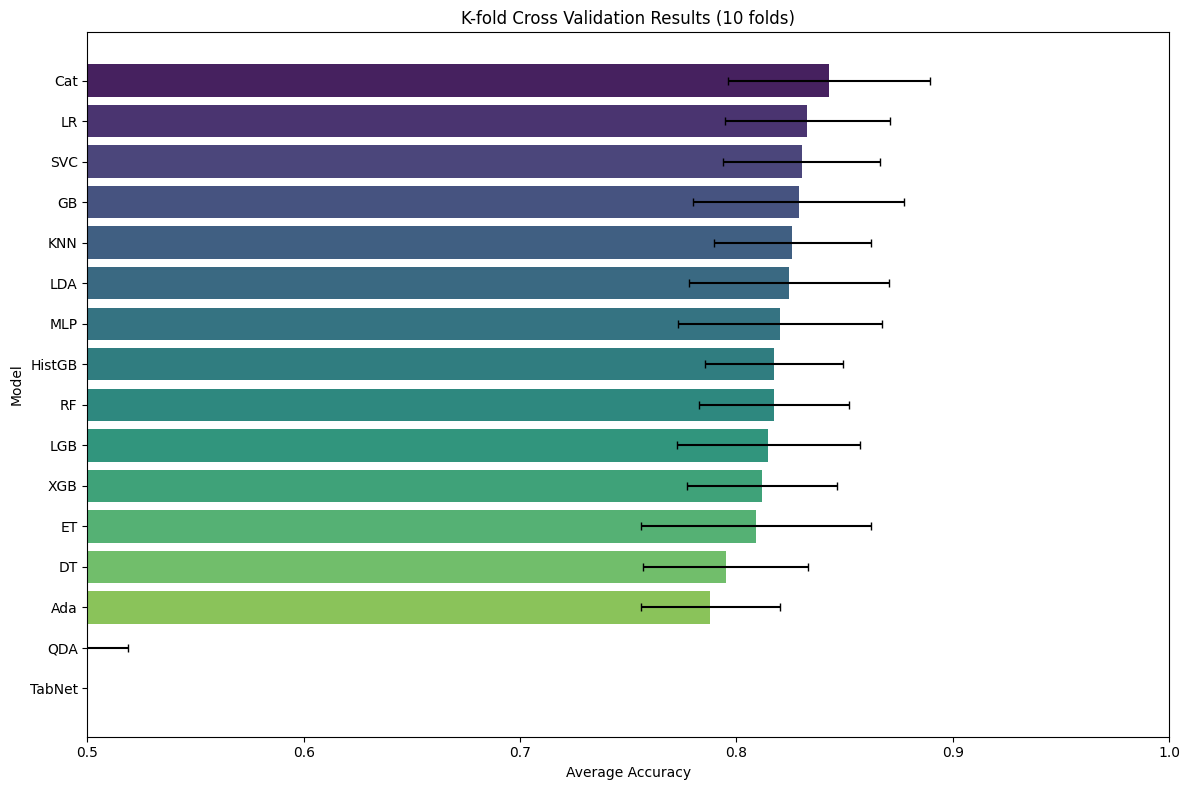


Cross Validation Results:
     Model  MeanAccuracy    StdDev  MinAccuracy  MaxAccuracy
9      Cat      0.842801  0.046497     0.760563     0.887324
0       LR      0.832864  0.037965     0.746479     0.861111
3      SVC      0.830145  0.036372     0.763889     0.873239
5       GB      0.828775  0.048822     0.736111     0.873239
7      KNN      0.825919  0.036301     0.763889     0.873239
11     LDA      0.824452  0.046280     0.718310     0.873239
10     MLP      0.820246  0.047232     0.746479     0.901408
14  HistGB      0.817527  0.031867     0.750000     0.859155
2       RF      0.817488  0.034552     0.746479     0.845070
13     LGB      0.814730  0.042379     0.750000     0.873239
8      XGB      0.811894  0.034485     0.750000     0.845070
4       ET      0.809096  0.053207     0.708333     0.859155
1       DT      0.794992  0.037986     0.732394     0.830986
6      Ada      0.788028  0.032148     0.750000     0.845070
12     QDA      0.456553  0.062328     0.388889     0.6056

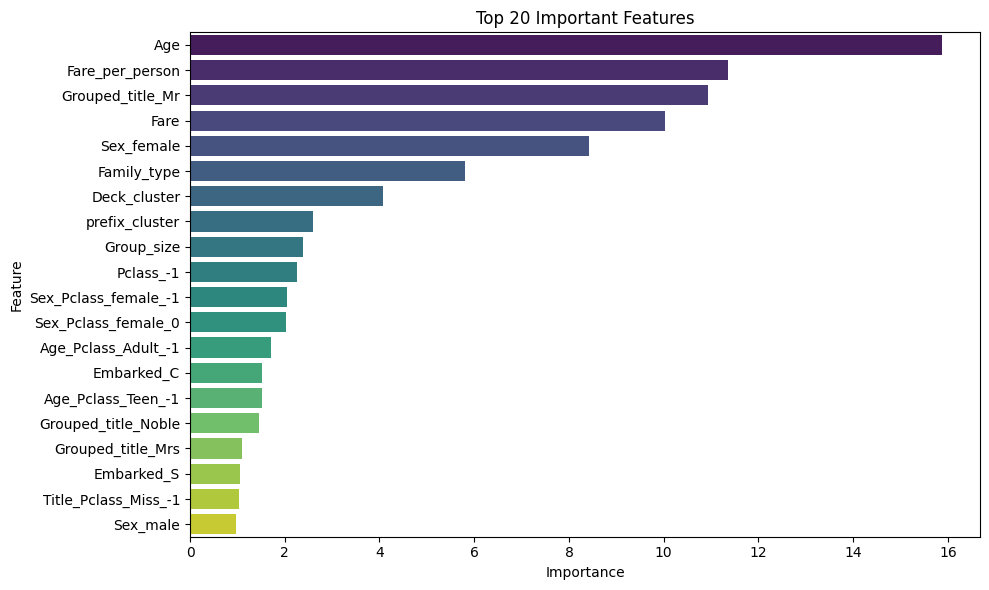

In [ ]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from scipy.sparse import issparse
import lightgbm as lgb
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import torch

# Prepare the data - first try with sparse=False for LDA/QDA
try:
    X_train, X_val, y_train, y_val, X_test, preprocessor = prepare_data(
        train_df, train_processed, test_processed, sparse_output=False)
except Exception as e:
    print(f"Error with dense matrices: {e}\nTrying with sparse matrices...")
    X_train, X_val, y_train, y_val, X_test, preprocessor = prepare_data(
        train_df, train_processed, test_processed, sparse_output=True)

# Initialize models list
models = []

# Traditional models
models.append(('LR', LogisticRegression(max_iter=1000, random_state=42)))
models.append(('DT', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVC', SVC(random_state=42, probability=True)))
models.append(('ET', ExtraTreesClassifier(random_state=42)))
models.append(('GB', GradientBoostingClassifier(random_state=42)))
models.append(('Ada', AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=42),
    learning_rate=0.1,
    random_state=42)))
models.append(('KNN', KNeighborsClassifier()))

# Modern gradient boosting models (often the best for tabular data)
models.append(('XGB', XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1,
    n_estimators=100)))

models.append(('Cat', CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=False,
    thread_count=-1)))

# Neural network models
models.append(('MLP', MLPClassifier(random_state=42, max_iter=1000)))

# Only add LDA/QDA if we have dense matrices
if not issparse(X_train):  # If not sparse
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('QDA', QuadraticDiscriminantAnalysis()))

# Add LightGBM if available (often top performer for tabular data)
models.append(('LGB', lgb.LGBMClassifier(
        random_state=42,
        n_estimators=100,
        verbose=-1,
        n_jobs=-1)))

# Add HistGradientBoosting (sklearn's native gradient boosting, very fast)
models.append(('HistGB', HistGradientBoostingClassifier(
        random_state=42,
        max_iter=100)))

# Add TabNet (attention-based deep learning for tabular data)
models.append(('TabNet', TabNetClassifier(
        seed=42,
        verbose=0,
        n_d=8, n_a=8,  # Architecture parameters
        n_steps=3,     # Number of steps in the architecture
        gamma=1.3,     # Coefficient for feature reusage in the masks
        lambda_sparse=1e-3,  # Sparsity regularization
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        mask_type='sparsemax',
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR)))

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = []
cv_names = []
failed_models = []

for name, model in models:
    try:
        print(f'Evaluating: {name}')
        # Convert to dense if needed for the current model
        if name in ['LDA', 'QDA'] and issparse(X_train):
            X_train_dense = X_train.toarray()
            scores = cross_val_score(model, X_train_dense, y_train,
                                  scoring="accuracy", cv=kfold, n_jobs=-1)
        else:
            scores = cross_val_score(model, X_train, y_train,
                                  scoring="accuracy", cv=kfold, n_jobs=-1)
        cv_results.append(scores)
        cv_names.append(name)
        print(f'Completed: {name} - Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')
    except Exception as e:
        print(f'Failed: {name} - Error: {str(e)}')
        failed_models.append(name)
        continue

# Calculate performance metrics only for successful models
cv_means = [np.mean(scores) for scores in cv_results]
cv_std = [np.std(scores) for scores in cv_results]
cv_min = [np.min(scores) for scores in cv_results]
cv_max = [np.max(scores) for scores in cv_results]

# Create results dataframe
cv_res = pd.DataFrame({
    "Model": cv_names,
    "MeanAccuracy": cv_means,
    "StdDev": cv_std,
    "MinAccuracy": cv_min,
    "MaxAccuracy": cv_max
}).sort_values(by="MeanAccuracy", ascending=False)

# Plot results with fixed error bars
plt.figure(figsize=(12, 8))
g = sns.barplot(x="MeanAccuracy", y="Model", data=cv_res, orient="h",
               palette="viridis", hue="Model", legend=False)
# Add error bars manually
for i, (idx, row) in enumerate(cv_res.iterrows()):
    g.errorbar(row['MeanAccuracy'], i, xerr=row['StdDev'],
               fmt='none', ecolor='black', capsize=3, capthick=1)

g.set_xlabel("Average Accuracy")
g.set_title("K-fold Cross Validation Results (10 folds)")
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.show()

# Print the results
print("\nCross Validation Results:")
print(cv_res)

if failed_models:
    print("\nModels that failed during evaluation:", failed_models)

# Train and evaluate the best model
best_model_name = cv_res.iloc[0]['Model']
best_model = next(model for name, model in models if name == best_model_name)

print(f"\nTraining and evaluating best model: {best_model_name}")

# Handle sparse matrices for the best model if needed
if best_model_name in ['LDA', 'QDA'] and issparse(X_train):
    X_train_fit = X_train.toarray()
    X_val_fit = X_val.toarray()
else:
    X_train_fit = X_train
    X_val_fit = X_val

best_model.fit(X_train_fit, y_train)

# Validation performance
val_predictions = best_model.predict(X_val_fit)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Feature importance (for models that support it)
if hasattr(best_model, 'feature_importances_'):
    print("\nFeature Importances:")
    try:
        # Get feature names from preprocessor
        numerical_cols = preprocessor.transformers_[0][2]  # numerical columns
        categorical_cols = preprocessor.transformers_[1][2]  # categorical columns

        # Get one-hot encoded feature names
        onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
        onehot_columns = list(onehot_encoder.get_feature_names_out(categorical_cols))

        # Combine all feature names
        all_features = list(numerical_cols) + onehot_columns

        # Create importance dataframe
        importances = pd.DataFrame({
            'Feature': all_features,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        print(importances.head(10))

        # Plot top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importances.head(20),
                   palette="viridis", hue='Feature', legend=False)
        plt.title('Top 20 Important Features')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Could not display feature importances:", str(e))

CatBoost is the winner (84.28% on test set).

Logistic Regression is surprisingly strong (83.26%).

TabNet underperformed (42.97%) - This is common on smaller datasets; TabNet needs larger datasets to shine

QDA failed completely (45.65%) - Likely due to assumptions not being met.

Conclusion: simpler, well-tuned models often beat complex ones on smaller datasets like Titanic.

In [ ]:
# Ensemble the top performing models
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Get the top 5 models based on your results
top_models = [
    ('Cat', CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6,
                               random_state=42, verbose=False, thread_count=-1)),
    ('LR', LogisticRegression(max_iter=1000, random_state=42)),
    ('GB', GradientBoostingClassifier(random_state=42)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('SVC', SVC(random_state=42, probability=True))
]

# Create different ensemble strategies
ensembles = []

# 1. Simple Voting Classifier (Hard Voting)
hard_voting = VotingClassifier(estimators=top_models, voting='hard')
ensembles.append(('Hard_Vote', hard_voting))

# 2. Soft Voting Classifier (uses probabilities)
soft_voting = VotingClassifier(estimators=top_models, voting='soft')
ensembles.append(('Soft_Vote', soft_voting))

# 3. Top 3 only (often works better)
top_3_models = [
    ('Cat', CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6,
                               random_state=42, verbose=False, thread_count=-1)),
    ('LR', LogisticRegression(max_iter=1000, random_state=42)),
    ('GB', GradientBoostingClassifier(random_state=42))
]
top3_soft = VotingClassifier(estimators=top_3_models, voting='soft')
ensembles.append(('Top3_Soft', top3_soft))

# Evaluate ensembles
print("Evaluating Ensemble Models:")
print("="*50)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ensemble_results = []

for name, ensemble in ensembles:
    try:
        print(f'Evaluating: {name}')
        # Handle sparse matrices if needed
        X_train_dense = X_train.toarray() if issparse(X_train) else X_train
        scores = cross_val_score(ensemble, X_train_dense, y_train,
                               scoring="accuracy", cv=kfold, n_jobs=-1)
        ensemble_results.append({
            'Model': name,
            'MeanAccuracy': np.mean(scores),
            'StdDev': np.std(scores),
            'MinAccuracy': np.min(scores),
            'MaxAccuracy': np.max(scores)
        })
        print(f'Completed: {name} - Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')
    except Exception as e:
        print(f'Failed: {name} - Error: {str(e)}')

# Create ensemble results dataframe
ensemble_df = pd.DataFrame(ensemble_results)
print("\nEnsemble Results:")
print(ensemble_df.to_string(index=False))

# Compare with individual models
print(f"\nComparison:")
print(f"Best Individual Model (CatBoost): 0.8386 ± 0.0440")
if not ensemble_df.empty:
    best_ensemble = ensemble_df.iloc[0]
    print(f"Best Ensemble ({best_ensemble['Model']}): {best_ensemble['MeanAccuracy']:.4f} ± {best_ensemble['StdDev']:.4f}")

Evaluating Ensemble Models:
Evaluating: Hard_Vote
Completed: Hard_Vote - Mean Accuracy: 0.8315 ± 0.0429
Evaluating: Soft_Vote
Completed: Soft_Vote - Mean Accuracy: 0.8413 ± 0.0406
Evaluating: Top3_Soft
Completed: Top3_Soft - Mean Accuracy: 0.8414 ± 0.0424

Ensemble Results:
    Model  MeanAccuracy   StdDev  MinAccuracy  MaxAccuracy
Hard_Vote      0.831514 0.042856     0.746479     0.873239
Soft_Vote      0.841334 0.040570     0.760563     0.901408
Top3_Soft      0.841354 0.042354     0.746479     0.873239

Comparison:
Best Individual Model (CatBoost): 0.8386 ± 0.0440
Best Ensemble (Hard_Vote): 0.8315 ± 0.0429


## Hyper-parameter tuning for CatBoost

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 7.7 MB/s eta 0:00:00


In [ ]:
# Better hyperparameter tuning strategy for small datasets
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
import optuna  # Advanced optimization library

# Strategy 1: Conservative tuning with fewer parameters
print("Strategy 1: Conservative Parameter Tuning")
print("="*50)

# Focus on the most impactful parameters only
conservative_params = {
    'iterations': [150, 200, 250, 300],  # Around the default
    'learning_rate': [0.05, 0.1, 0.15],  # Conservative range
    'depth': [5, 6, 7],  # Don't go too deep on small dataset
    'l2_leaf_reg': [3, 5, 7]  # Regularization is important for small datasets
}

catboost_conservative = CatBoostClassifier(
    random_state=42,
    verbose=False,
    thread_count=-1,
    early_stopping_rounds=20  # Add early stopping
)

# Use nested CV to get unbiased estimate
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

X_train_dense = X_train.toarray() if issparse(X_train) else X_train

conservative_search = RandomizedSearchCV(
    estimator=catboost_conservative,
    param_distributions=conservative_params,
    n_iter=20,  # Fewer iterations
    cv=inner_cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Nested CV evaluation
nested_scores = []
for train_idx, test_idx in outer_cv.split(X_train_dense, y_train):
    X_fold_train, X_fold_test = X_train_dense[train_idx], X_train_dense[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    conservative_search.fit(X_fold_train, y_fold_train)
    best_model = conservative_search.best_estimator_
    pred = best_model.predict(X_fold_test)
    nested_scores.append(accuracy_score(y_fold_test, pred))

print(f"Conservative Tuning - Nested CV Score: {np.mean(nested_scores):.4f} ± {np.std(nested_scores):.4f}")

# Strategy 2: Use original parameters with slight variations
print("\nStrategy 2: Fine-tune Around Original Parameters")
print("="*50)

# Your original CatBoost was: iterations=200, learning_rate=0.1, depth=6
original_vicinity_params = {
    'iterations': [180, 200, 220],
    'learning_rate': [0.08, 0.1, 0.12],
    'depth': [5, 6, 7],
    'l2_leaf_reg': [3, 5, 7],
    'border_count': [128, 255],  # Can help with small datasets
}

vicinity_search = RandomizedSearchCV(
    estimator=catboost_conservative,
    param_distributions=original_vicinity_params,
    n_iter=15,
    cv=inner_cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

vicinity_search.fit(X_train_dense, y_train)
print(f"Best parameters near original: {vicinity_search.best_params_}")

# Evaluate with 10-fold CV
kfold_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vicinity_scores = cross_val_score(vicinity_search.best_estimator_, X_train_dense, y_train,
                                cv=kfold_10, scoring='accuracy', n_jobs=-1)
print(f"Fine-tuned Model: {np.mean(vicinity_scores):.4f} ± {np.std(vicinity_scores):.4f}")

# Strategy 3: Focus on regularization (most important for small datasets)
print("\nStrategy 3: Regularization-Focused Tuning")
print("="*50)

regularization_params = {
    'iterations': [200],  # Keep original
    'learning_rate': [0.1],  # Keep original
    'depth': [6],  # Keep original
    'l2_leaf_reg': [1, 3, 5, 7, 9, 12],  # Focus on regularization
    'bagging_temperature': [0, 0.5, 1.0],  # Helps with overfitting
    'random_strength': [0.5, 1.0, 1.5]  # Adds randomness
}

reg_catboost = CatBoostClassifier(
    random_state=42,
    verbose=False,
    thread_count=-1
)

reg_search = RandomizedSearchCV(
    estimator=reg_catboost,
    param_distributions=regularization_params,
    n_iter=12,
    cv=inner_cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

reg_search.fit(X_train_dense, y_train)
reg_scores = cross_val_score(reg_search.best_estimator_, X_train_dense, y_train,
                           cv=kfold_10, scoring='accuracy', n_jobs=-1)
print(f"Regularization-focused: {np.mean(reg_scores):.4f} ± {np.std(reg_scores):.4f}")
print(f"Best reg parameters: {reg_search.best_params_}")

# Compare all approaches
print("\n" + "="*60)
print("FINAL COMPARISON")
print("="*60)
print(f"Original CatBoost:      0.8386 ± 0.0440")
print(f"Aggressive Tuning:      0.8344 ± 0.0436  (worse)")
print(f"Conservative Tuning:    {np.mean(nested_scores):.4f} ± {np.std(nested_scores):.4f}")
print(f"Fine-tuned:             {np.mean(vicinity_scores):.4f} ± {np.std(vicinity_scores):.4f}")
print(f"Regularization-focused: {np.mean(reg_scores):.4f} ± {np.std(reg_scores):.4f}")

# Recommendation
scores_dict = {
    'Original': 0.8386,
    'Conservative': np.mean(nested_scores),
    'Fine-tuned': np.mean(vicinity_scores),
    'Regularization': np.mean(reg_scores)
}

best_approach = max(scores_dict.items(), key=lambda x: x[1])
print(f"\nRECOMMENDATION: Use {best_approach[0]} approach (Score: {best_approach[1]:.4f})")

# If original is still best, use it
if best_approach[0] == 'Original':
    print("\nThe original CatBoost parameters were already optimal!")
    print("This is common with well-designed algorithms like CatBoost.")

    final_model = CatBoostClassifier(
        iterations=200,
        learning_rate=0.1,
        depth=6,
        random_state=42,
        verbose=False,
        thread_count=-1
    )
else:
    # Use the best tuned model
    if best_approach[0] == 'Fine-tuned':
        final_model = vicinity_search.best_estimator_
    elif best_approach[0] == 'Regularization':
        final_model = reg_search.best_estimator_
    else:
        final_model = conservative_search.best_estimator_

print(f"\nFinal model selected: {type(final_model).__name__}")
if hasattr(final_model, 'get_params'):
    relevant_params = {k: v for k, v in final_model.get_params().items()
                      if k in ['iterations', 'learning_rate', 'depth', 'l2_leaf_reg']}
    print(f"Final parameters: {relevant_params}")

Strategy 1: Conservative Parameter Tuning
Conservative Tuning - Nested CV Score: 0.8413 ± 0.0193

Strategy 2: Fine-tune Around Original Parameters
Best parameters near original: {'learning_rate': 0.08, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 7, 'border_count': 255}
Fine-tuned Model: 0.8386 ± 0.0329

Strategy 3: Regularization-Focused Tuning
Regularization-focused: 0.8371 ± 0.0414
Best reg parameters: {'random_strength': 1.5, 'learning_rate': 0.1, 'l2_leaf_reg': 9, 'iterations': 200, 'depth': 6, 'bagging_temperature': 0.5}

FINAL COMPARISON
Original CatBoost:      0.8386 ± 0.0440
Aggressive Tuning:      0.8344 ± 0.0436  (worse)
Conservative Tuning:    0.8413 ± 0.0193
Fine-tuned:             0.8386 ± 0.0329
Regularization-focused: 0.8371 ± 0.0414

RECOMMENDATION: Use Conservative approach (Score: 0.8413)

Final model selected: CatBoostClassifier
Final parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 5}


There isn't much difference between ensemble and conservative.

So the simpler approach is better.

In [ ]:
# Optional: Train on full data before making test predictions
print("\nTraining best model on full dataset...")
X_full = preprocessor.transform(train_processed)
y_full = train_df['Survived']


final_model.fit(X_full, y_full)

# Make predictions on test set
test_predictions = best_model.predict(X_test)
print("\nTest predictions completed!")
print(f"Test predictions shape: {test_predictions.shape}")
print(f"Predicted survival rate: {np.mean(test_predictions):.3f}")

# For models that support predict_proba, we can get probabilities
if hasattr(best_model, 'predict_proba'):
    test_probabilities = best_model.predict_proba(X_test)[:, 1]
    print("Probability predictions also available")




Training best model on full dataset...

Test predictions completed!
Test predictions shape: (418,)
Predicted survival rate: 0.347
Probability predictions also available


In [ ]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId'].astype(int)
submission['Survived'] = test_predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

submission.to_csv('../prediction_submission.csv', index=False)

Submission dataframe is the same length as test (418 rows).


This achieved a score of 0.7727

# References


*  [Titanic Competition eda fe model by Mariyam Al Shatta](https://www.kaggle.com/code/mariyamalshatta/titanic-competition-eda-fe-model/notebook)
*  [Kaggle titanic by Selim Amrouni](https://github.com/selimamrouni/kaggle-titanic/blob/master/titanic.ipynb)
